<a href="https://colab.research.google.com/github/ivaibhavjindal/DIC/blob/master/Medical_Imaging_Dicom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Computed Tomography (CT Scan)

* Computed Tomography technology was originally created for taking detailed pictures of the brain. Now, it is much more advanced and is used for taking pictures of virtually any part of the body. In other words, CT scans are used to take pictures of internal organs, bones, soft tissue, and blood vessels. They may be ordered for acute injuries and conditions or for chronic vascular conditions. They are also an invaluable tool in determining the exact size and location of tumors and guiding procedures to treat tumors.

* A computed tomography scan, known as a CT scan combines a series of X-ray images taken from many different angles with computer processing technology, to create sections of images of the bones and soft tissue inside the body. For example, a CT scan can be related to slicing bread. Each section or slice of images can be viewed individually to get a better visualization and overall picture of the body. CT scan images can provide much more information than plain X-rays and other diagnostic imaging.

* More about diagnostic Image Tests: https://www.independentimaging.com/abcs-imaging-difference-xray-ultrasound-mri-ct-scan/

DICOM stands for Digital Imaging and Communications in Medicine. DICOM is standard created by the National Electrical Manufacturers Association (NEMA). It defines a standard for handling, storing, printing and transmitting information in medical imaging.
A DICOM file consists of a header and the image data in the same file (*.dcm). The size of the header depends on how much header information is provided. The header contains information such the Patient Id, Patient Name, Modality and other information. It defines also how many frames are contained and in which resolutions. This is used by image viewers to display the image. For a single acquisition there will be a lot of DICOM files.
A python library to read dicom files is pydicom.

Know More: https://en.wikipedia.org/wiki/DICOM 


In [ ]:
!pip install pydicom

     |████████████████████████████████| 35.5MB 1.2MB/s 


## Image Formats

* JPEG (Joint Photographic Experts Group): The JPEG format is the most popular format and can be read by all computer platforms. Because JPEG files are small in size and extremely portable, they are the preferred format when transferring images over the Web. The advantage of the JPEG format is that it facilitates use of compression to reduce file size. Typically, the least noticeable bits of information are removed by complex mathematical algorithms, so that the image is represented with less information. When saving as a JPEG file, options are available for selecting the amount of compression that can be applied. The more the file is compressed (lossy compression), the more the original image information lost; such an image will not look good when reproduced. Lesser degrees of compression (lossless compression) retain high image quality, but this is achieved at the cost of a large file size.

* TIFF (Tagged Image File Format): The TIFF format is versatile and supports the full range of image sizes, resolutions, and color depths. Since TIFF images are saved without compression or with a lossless compression scheme they retain the original image quality and often are large in size.[13] TIFF is preferred where high image quality is desired, for example, when the image contains illustrations and line diagrams.

* GIF (Graphics Interchange Format): GIF is an old file format that is compatible with older versions of internet browsers and other software. A major advantage of this format is its ability to save animations. It can store only a limited amount of color information and is becoming increasingly unpopular as a format for storing digital images.

* PNG (Portable Networks Graphics): The PNG file format was developed to outperform and eventually replace the GIF format. It has better browser compatibility and supports greater color depth than the GIF format. Its lossless compression enables better image quality, though at the expense of large file sizes.

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3354356/

In [ ]:
from google.colab import files
import os
import zipfile
import cv2
import pydicom
import numpy as np
from PIL import Image, ImageFilter

os.mkdir('/detection')
os.mkdir('/detection/dicom/')

uploaded_zip = files.upload()

zip_ref = zipfile.ZipFile('/dicoms.zip', 'r')

zip_ref.extractall('/detection/dicom/')
zip_ref.close()

In [ ]:

inputdir = '/detection/dicom/series-000001/'
outdir = '/detection/png/'
os.mkdir(outdir)

test_list = [ f for f in  os.listdir(inputdir)]

for f in test_list:   # convert all images 
    ds = pydicom.read_file(inputdir + f) # read dicom image
    img = ds.pixel_array # get image array
    cv2.imwrite(outdir + f.replace('.dcm','.png'), img) # write png image

png_names = os.listdir(outdir)

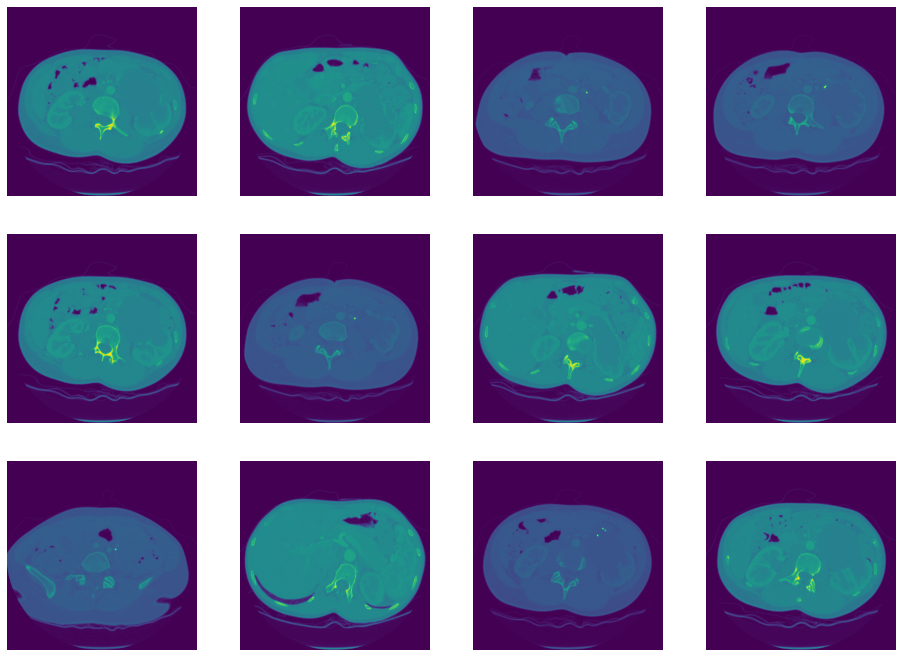

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
png_names = os.listdir(outdir)

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
i = 0
for name in png_names[:12]:
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(outdir+name)
  plt.imshow(img)
  i = i+1

plt.show()



The noise in CT images reduces the visibility of low contrast objects (which is the prime reason for the widespread application of CT).**CT images are prone to Gaussian noise due to the electrical signals appear.** The high speed computation of CT images from multiple planar views results in thermal energy fluctuations which lead to the manifestation of Gaussian noise in these images. Besides this CT images are also noisy due to mathematical computations and quantum statistics. The presence of random noise in CT images limits the ability of the medical practitioners to discriminate between tissues of varying density.

Source: https://biomedpharmajournal.org/vol11no3/noise-issues-prevailing-in-various-types-of-medical-images/

Image Filters: https://jblindsay.github.io/wbt_book/available_tools/image_processing_tools_filters.html

Image Filter Implementation: https://towardsdatascience.com/image-filters-in-python-26ee938e57d2

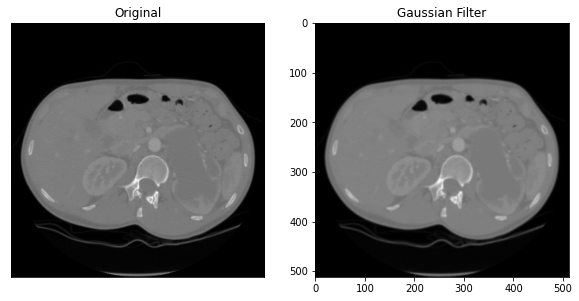

In [ ]:
# Gaussian Filter
image_name = outdir + png_names[1]
image = mpimg.imread(image_name)

gaussian_img = cv2.GaussianBlur(image, (5,5),0)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(image, cmap='gray') 
plt.title('Original')

plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(gaussian_img, cmap='gray')
plt.title('Gaussian Filter')

plt.show()

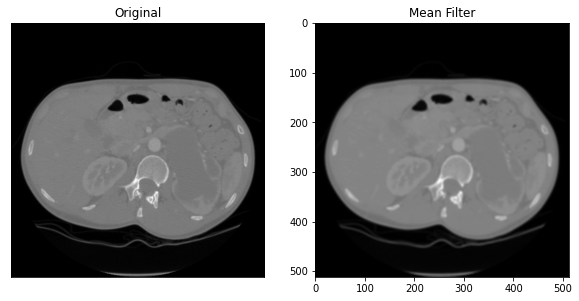

In [ ]:
# Mean Filter
mean_filter_img = cv2.blur(image, (5,5))

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(image, cmap='gray') 
plt.title('Original')

plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(mean_filter_img, cmap='gray')
plt.title('Mean Filter')

plt.show()

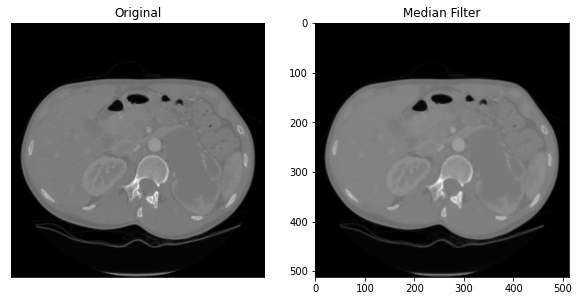

In [ ]:
# Median Filter
median_filter_img = cv2.medianBlur(image, 5)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(image, cmap='gray') 
plt.title('Original')

plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(median_filter_img, cmap='gray')
plt.title('Median Filter')

plt.show()

In [ ]:
# Conservative Smoothing Filter
# first a conservative filter for grayscale images will be defined.
def conservative_smoothing_gray(data, filter_size):
    temp = []
    
    indexer = filter_size // 2
    
    new_image = data.copy()
    
    nrow, ncol = data.shape
    
    for i in range(nrow):
        
        for j in range(ncol):
            
            for k in range(i-indexer, i+indexer+1):
                
                for m in range(j-indexer, j+indexer+1):
                    
                    if (k > -1) and (k < nrow):
                        
                        if (m > -1) and (m < ncol):
                            
                            temp.append(data[k,m])
                            
            temp.remove(data[i,j])
            
            
            max_value = max(temp)
            
            min_value = min(temp)
            
            if data[i,j] > max_value:
                
                new_image[i,j] = max_value
            
            elif data[i,j] < min_value:
                
                new_image[i,j] = min_value
            
            temp =[]
    
    return new_image.copy()

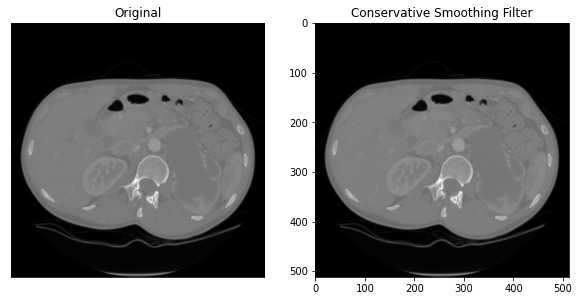

In [ ]:
# Implementation
conservative_smoothing_img = conservative_smoothing_gray(image, 5)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(image, cmap='gray') 
plt.title('Original')

plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(conservative_smoothing_img, cmap='gray')
plt.title('Conservative Smoothing Filter')

plt.show()